In [1]:
import requests

In [2]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

In [3]:
page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

# Parsing a page with BeautifulSoup
* As you can see above, we now have downloaded an HTML document.
* We can use the BeautifulSoup library to parse this document, and extract the text from the p tag.
* We first have to import the library, and create an instance of the BeautifulSoup class to parse our document:

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

### We can now print out the HTML content of the page, formatted nicely, using the prettify method on the BeautifulSoup object:

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


* As all the tags are nested, we can move through the structure one level at a time. 
* We can first select all the elements at the top level of the page using the children property of soup.
* Note that children returns a list generator, so we need to call the list function on it:

In [6]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

* The above tells us that there are two tags at the top level of the page — the initial '!DOCTYPE html tag', and the 'html'tag. 
* There is a newline character (n) in the list as well.  
* Let’s see what the type of each element in the list is:

In [7]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

### As you can see, all of the items are BeautifulSoup objects. 
* The first is a Doctype object, which contains information about the type of the document.
* The second is a NavigableString, which represents text found in the HTML document. 
* The final item is a Tag object, which contains other nested tags.
* The most important object type, and the one we’ll deal with most often, is the Tag object.

* The Tag object allows us to navigate through an HTML document, and extract other tags and text. 
* You can learn more about the various BeautifulSoup objects here.

* We can now select the html tag and its children by taking the third item in the list:

In [10]:
html = list(soup.children)[2]
html

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

* Each item in the list returned by the children property is also a BeautifulSoup object, so we can also call the children method on html.

* Now, we can find the children inside the html tag:

In [9]:
list(html.children)

['\n',
 <head>
 <title>A simple example page</title>
 </head>,
 '\n',
 <body>
 <p>Here is some simple content for this page.</p>
 </body>,
 '\n']

* As you can see above, there are two tags here, head, and body.
* We want to extract the text inside the p tag, so we’ll dive into the body:

In [11]:
body = list(html.children)[3]

* Now, we can get the p tag by finding the children of the body tag:

In [12]:
list(body.children)

['\n', <p>Here is some simple content for this page.</p>, '\n']

* We can now isolate the p tag:

In [13]:
p = list(body.children)[1]

* Once we’ve isolated the tag, we can use the get_text method to extract all of the text inside the tag:

In [14]:
p.get_text()

'Here is some simple content for this page.'

### Finding all instances of a tag at once
* What we did above was useful for figuring out how to navigate a page, but it took a lot of commands to do something fairly simple. 
* If we want to extract a single tag, we can instead use the find_all method, which will find all the instances of a tag on a page.

In [15]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

* Note that find_all returns a list, so we’ll have to loop through, or use list indexing, it to extract text:

In [16]:
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

* If you instead only want to find the first instance of a tag, you can use the find method, which will return a single BeautifulSoup object:

In [17]:
soup.find('p')

<p>Here is some simple content for this page.</p>

### Searching for tags by class and id
* We introduced classes and ids earlier, but it probably wasn’t clear why they were useful. 
* Classes and ids are used by CSS to determine which HTML elements to apply certain styles to. 
* We can also use them when scraping to specify specific elements we want to scrape.
* To illustrate this principle, we’ll work with the following page:

In [ ]:
"""<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>
"""

In [18]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
soup

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

* Now, we can use the find_all method to search for items by class or by id. In the below example, we’ll search for any p tag that has the class outer-text:

In [22]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

* In the below example, we’ll look for any tag that has the class outer-text:

In [24]:
soup.find_all(class_="outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

* We can also search for elements by id:

In [25]:
soup.find_all(id="first")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

### Using CSS Selectors
###  You can also search for items using CSS selectors. These selectors are how the CSS language allows developers to specify HTML tags to style. Here are some examples:

  * p a — finds all a tags inside of a p tag.
  * body p a — finds all a tags inside of a p tag inside of a body tag.
  * html body — finds all body tags inside of an html tag.
  * p.outer-text — finds all p tags with a class of outer-text.
  * p#first — finds all p tags with an id of first.
  * body p.outer-text — finds any p tags with a class of outer-text inside of a body tag.

#### You can learn more about CSS selectors here.

* BeautifulSoup objects support searching a page via CSS selectors using the select method.
* We can use CSS selectors to find all the p tags in our page that are inside of a div like this:

In [26]:
soup.select("div p")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>]

* Note that the select method above returns a list of BeautifulSoup objects, just like find and find_all.

### Downloading weather data

* We now know enough to proceed with extracting information about the local weather from the National Weather Service website. The first step is to find the page we want to scrape. 
* We’ll extract weather information about downtown San Francisco from this page.

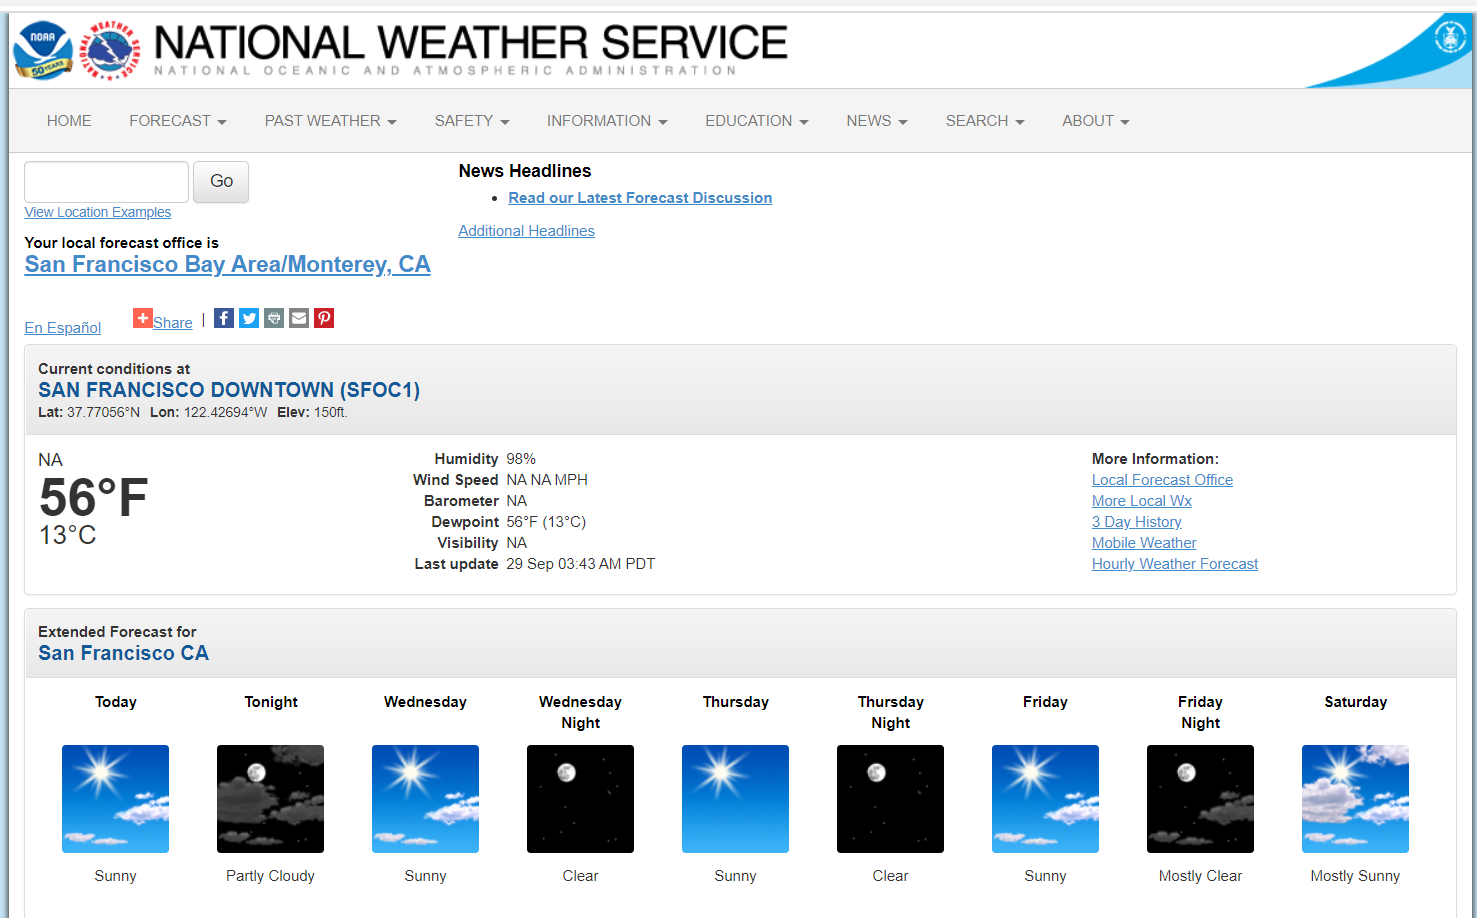

* We now know enough to download the page and start parsing it. In the below code, we:

* Download the web page containing the forecast.
* Create a BeautifulSoup class to parse the page.
* Find the div with id seven-day-forecast, and assign to seven_day
* Inside seven_day, find each individual forecast item.
* Extract and print the first forecast item.

In [28]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Today
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Today: Sunny, with a high near 76. Light west wind increasing to 5 to 10 mph in the afternoon. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 76. Light west wind increasing to 5 to 10 mph in the afternoon. "/>
 </p>
 <p class="short-desc">
  Sunny
 </p>
 <p class="temp temp-high">
  High: 76 °F
 </p>
</div>


### Extracting information from the page

* As you can see, inside the forecast item tonight is all the information we want. There are 4 pieces of information we can extract:

* The name of the forecast item — in this case, Tonight.
* The description of the conditions — this is stored in the title property of img.
* A short description of the conditions — in this case, Mostly Clear.
* The temperature low — in this case, 49 degrees.
* We’ll extract the name of the forecast item, the short description, and the temperature first, since they’re all similar:

In [29]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Today
Sunny
High: 76 °F


 * Now, we can extract the title attribute from the img tag. To do this, 
 * we just treat the BeautifulSoup object like a dictionary, and pass in the attribute we want as a key:

In [30]:
img = tonight.find("img")
desc = img['title']
print(desc)

Today: Sunny, with a high near 76. Light west wind increasing to 5 to 10 mph in the afternoon. 


### Extracting all the information from the page

* Now that we know how to extract each individual piece of information, we can combine our knowledge with css selectors and list comprehensions to extract everything at once.In the below code, we:
* Select all items with the class period-name inside an item with the class tombstone-container in seven_day.
* Use a list comprehension to call the get_text method on each BeautifulSoup object

In [32]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Today',
 'Tonight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight',
 'Saturday']

* As you can see above, our technique gets us each of the period names, in order. We can apply the same technique to get the other 3 fields:

In [36]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Sunny', 'Partly Cloudy', 'Sunny', 'Clear', 'Sunny', 'Clear', 'Sunny', 'Mostly Clear', 'Mostly Sunny']
['High: 76 °F', 'Low: 59 °F', 'High: 79 °F', 'Low: 60 °F', 'High: 80 °F', 'Low: 61 °F', 'High: 80 °F', 'Low: 59 °F', 'High: 73 °F']
['Today: Sunny, with a high near 76. Light west wind increasing to 5 to 10 mph in the afternoon. ', 'Tonight: Partly cloudy, with a low around 59. West southwest wind 6 to 13 mph. ', 'Wednesday: Sunny, with a high near 79. Light west southwest wind becoming west 6 to 11 mph in the afternoon. ', 'Wednesday Night: Clear, with a low around 60. West southwest wind 7 to 13 mph. ', 'Thursday: Sunny, with a high near 80. Calm wind becoming west 5 to 9 mph in the afternoon. ', 'Thursday Night: Clear, with a low around 61.', 'Friday: Sunny, with a high near 80.', 'Friday Night: Mostly clear, with a low around 59.', 'Saturday: Mostly sunny, with a high near 73.']


### Combining our data into a Pandas Dataframe

'''We can now combine the data into a Pandas DataFrame and analyze it.''' 
* A DataFrame is an object that can store tabular data, making data analysis easy.


* In order to do this, we’ll call the DataFrame class, and pass in each list of items that we have. 
* We pass them in as part of a dictionary. 
* Each dictionary key will become a column in the DataFrame, and each list will become the values in the column:

In [44]:
import pandas as pd
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})
weather

,period,short_desc,temp,desc
0,Today,Sunny,High: 76 °F,"Today: Sunny, with a high near 76. Light west ..."
1,Tonight,Partly Cloudy,Low: 59 °F,"Tonight: Partly cloudy, with a low around 59. ..."
2,Wednesday,Sunny,High: 79 °F,"Wednesday: Sunny, with a high near 79. Light w..."
3,WednesdayNight,Clear,Low: 60 °F,"Wednesday Night: Clear, with a low around 60. ..."
4,Thursday,Sunny,High: 80 °F,"Thursday: Sunny, with a high near 80. Calm win..."
5,ThursdayNight,Clear,Low: 61 °F,"Thursday Night: Clear, with a low around 61."
6,Friday,Sunny,High: 80 °F,"Friday: Sunny, with a high near 80."
7,FridayNight,Mostly Clear,Low: 59 °F,"Friday Night: Mostly clear, with a low around 59."
8,Saturday,Mostly Sunny,High: 73 °F,"Saturday: Mostly sunny, with a high near 73."


* We can now do some analysis on the data. 
* For example, we can use a regular expression and the Series.str.extract method to pull out the numeric temperature values:

In [51]:
temp_nums = weather["temp"].str.extract(r'(?P<temp_num>\d+)', expand=False)
weather["temp_num"] = temp_nums.astype('int')
temp_nums

0    76
1    59
2    79
3    60
4    80
5    61
6    80
7    59
8    73
Name: temp_num, dtype: object

* We could then find the mean of all the high and low temperatures:

In [52]:
weather["temp_num"].mean()

69.66666666666667

* We could also only select the rows that happen at night:

In [53]:
is_night = weather["temp"].str.contains("Low")
weather["is_night"] = is_night
is_night

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
Name: temp, dtype: bool

In [54]:
weather[is_night]

,period,short_desc,temp,desc,temp_num,is_night
1,Tonight,Partly Cloudy,Low: 59 °F,"Tonight: Partly cloudy, with a low around 59. ...",59,True
3,WednesdayNight,Clear,Low: 60 °F,"Wednesday Night: Clear, with a low around 60. ...",60,True
5,ThursdayNight,Clear,Low: 61 °F,"Thursday Night: Clear, with a low around 61.",61,True
7,FridayNight,Mostly Clear,Low: 59 °F,"Friday Night: Mostly clear, with a low around 59.",59,True
